In [1]:
import kagglehub
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import shutil
from pathlib import Path
from zipfile import ZipFile

In [2]:
def inspect_dataset(title, path):
    print(f"\nDataset: {title}")
    print("File Tree:")
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f'{indent}{os.path.basename(root)}/')

    images = []
    for root, dirs, files in os.walk(path):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                images.append(os.path.join(root, f))
    print(f"Found {len(images)} images.")
    if images:
        plt.figure(figsize=(12, 4))
        for i, img_path in enumerate(images[:5]):
            img = Image.open(img_path)
            plt.subplot(1, 5, i+1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

100%|██████████| 101M/101M [00:00<00:00, 140MB/s] 

Extracting files...



Dataset: Batik Nusantara (hendryhb)
File Tree:
2/
    raw_batik_v2/
        raw_batik_v2/
            test/
                NTB_Lumbung/
                Aceh_Pintu_Aceh/
                Lampung_Gajah/
                Papua_Tifa/
                Bali_Barong/
                Papua_Cendrawasih/
                Sumatera_Barat_Rumah_Minang/
                Jawa_Timur_Pring/
                Papua_Asmat/
                Bali_Merak/
                Yogyakarta_Parang/
                Solo_Parang/
                Jawa_Barat_Megamendung/
                DKI_Ondel_Ondel/
                Yogyakarta_Kawung/
                Maluku_Pala/
                Sumatera_Utara_Boraspati/
                Madura_Mataketeran/
                Sulawesi_Selatan_Lontara/
                Kalimantan_Dayak/
            train/
                NTB_Lumbung/
                Aceh_Pintu_Aceh/
                Lampung_Gajah/
                Papua_Tifa/
                Bali_Barong/
                Papua_Cendrawasih/
           

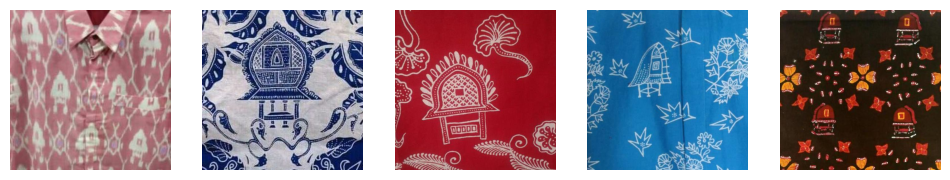

In [3]:
# === Dataset 1 ===
path1 = kagglehub.dataset_download("hendryhb/batik-nusantara-batik-indonesia-dataset")
inspect_dataset("Batik Nusantara (hendryhb)", path1)

100%|██████████| 262M/262M [00:01<00:00, 158MB/s]

Extracting files...



Dataset: Indonesian Batik Motifs (dionisiusdh)
File Tree:
1/
    batik-tambal/
    batik-gentongan/
    batik-ceplok/
    batik-sidomukti/
    batik-garutan/
    batik-bali/
    batik-sidoluhur/
    batik-ciamis/
    batik-sogan/
    batik-priangan/
    batik-keraton/
    batik-betawi/
    batik-celup/
    batik-kawung/
    batik-parang/
    batik-cendrawasih/
    batik-sekar/
    batik-pekalongan/
    batik-lasem/
    batik-megamendung/
Found 983 images.


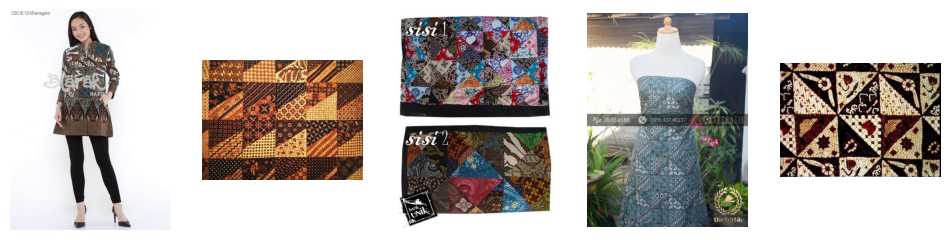

In [4]:
# === Dataset 2 ===
path2 = kagglehub.dataset_download("dionisiusdh/indonesian-batik-motifs")
inspect_dataset("Indonesian Batik Motifs (dionisiusdh)", path2)

100%|██████████| 156M/156M [00:00<00:00, 171MB/s]

Extracting files...



Dataset: Batik Motifs Corak App (alfanme)
File Tree:
7/
    DATASETmin/
        DATASETmin/
            TEST/
                Batik Sekar Jagad/
                Batik Cendrawasih/
                Batik Tambal/
                Batik Ikat Celup/
                Batik Poleng/
                Batik Kawung/
                Batik Megamendung/
                Batik Insang/
                Batik Dayak/
                Batik Parang/
            TRAIN/
                Batik Sekar Jagad/
                Batik Cendrawasih/
                Batik Tambal/
                Batik Ikat Celup/
                Batik Poleng/
                Batik Kawung/
                Batik Megamendung/
                Batik Insang/
                Batik Dayak/
                Batik Parang/
    DATASETv4/
        DATASET/
            TEST/
                Batik Sekar Jagad/
                Batik Cendrawasih/
                Batik Betawi/
                Batik Tambal/
                Batik Ikat Celup/
                Bati

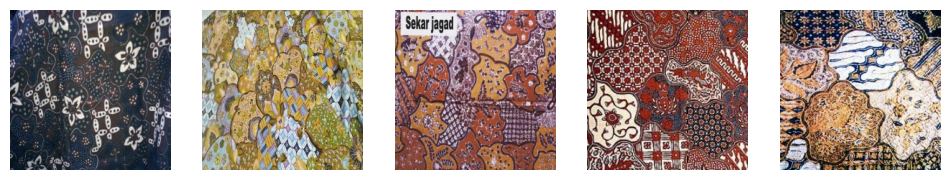

In [5]:
# === Dataset 3 ===
path3 = kagglehub.dataset_download("alfanme/indonesian-batik-motifs-corak-app")
inspect_dataset("Batik Motifs Corak App (alfanme)", path3)

In [7]:
!cp -r /root/.cache/kagglehub/datasets/hendryhb/batik-nusantara-batik-indonesia-dataset/versions/2/raw_batik_v2 /content/raw_batik_v2
!cp -r /root/.cache/kagglehub/datasets/dionisiusdh/indonesian-batik-motifs/versions/1/ /content/indonesian-batik-motifs
!cp -r /root/.cache/kagglehub/datasets/alfanme/indonesian-batik-motifs-corak-app/versions/7//DATASETv7 /content/DATASETv7

In [10]:
ds1 = Path("/content/raw_batik_v2/raw_batik_v2")
ds2 = Path("/content/indonesian-batik-motifs")
ds3 = Path("/content/DATASETv7")

In [24]:
ds1_classes = [
    "Bali_Barong", "Maluku_Pala", "Madura_Mataketeran", "Lampung_Gajah", "Solo_Parang",
    "Papua_Cendrawasih", "NTB_Lumbung", "Yogyakarta_Kawung", "Kalimantan_Dayak", "Papua_Asmat",
    "Sumatera_Utara_Boraspati", "Papua_Tifa", "Jawa_Timur_Pring", "Sulawesi_Selatan_Lontara",
    "Jawa_Barat_Megamendung", "Yogyakarta_Parang", "Sumatera_Barat_Rumah_Minang", "Aceh_Pintu_Aceh",
    "Bali_Merak", "DKI_Ondel_Ondel"
]

In [25]:
related_mapping = {
    "Bali_Barong": ["batik-bali", "Batik Bali"],
    "Maluku_Pala": ["batik-pala", "Batik Pala"],
    "Solo_Parang": ["batik-parang", "Batik Parang", "Yogyakarta_Parang"],
    "Papua_Cendrawasih": ["batik-cendrawasih", "Batik Cendrawasih"],
    "Yogyakarta_Kawung": ["batik-kawung", "Batik Kawung"],
    "Kalimantan_Dayak": ["batik-dayak", "Batik Dayak"],
    "Jawa_Barat_Megamendung": ["batik-megamendung", "Batik Megamendung"],
    "DKI_Ondel_Ondel": ["batik-betawi", "Batik Betawi"],
}

In [26]:
output_base = Path("/content/merged_batik_dataset")
for cls in ds1_classes:
    (output_base / "train" / cls).mkdir(parents=True, exist_ok=True)

In [27]:
def copy_ds1_images():
    for split in ["train", "test"]:
        for cls in ds1_classes:
            src = ds1 / split / cls
            if src.exists():
                for file in src.iterdir():
                    if file.suffix.lower() in [".jpg"]:
                        shutil.copy2(file, output_base / "train" / cls / file.name)

def copy_related_images():
    for cls, folders in related_mapping.items():
        for folder in folders:
            for base in [ds2, ds3 / "TRAIN", ds3 / "TEST"]:
                src = base / folder
                if src.exists():
                    for file in src.iterdir():
                        if file.suffix.lower() in [".jpg"]:
                            shutil.copy2(file, output_base / "train" / cls / file.name)

In [28]:
copy_ds1_images()
copy_related_images()

In [30]:
zip_path = shutil.make_archive("/content/merged_batik_dataset", 'zip', root_dir=output_base)